In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset and understand it.

In [4]:
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


In [5]:
df.info() # shows rows and columns count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,12153.596544,11567.149118,9793.348813,2263.663172,2678.826162
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,9042.040766,8942.672613,7065.522127,2608.111964,4447.136012
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,5576.930000,5112.310000,4600.000000,662.180000,218.680000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,9899.640319,9287.150000,8000.000000,1348.910000,546.140000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,16534.433040,15798.810000,13653.260000,2833.400000,3293.160000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,58563.679930,58563.680000,35000.020000,23563.680000,36115.200000


## List down the number of rows and columns.

In [7]:
columns=df.columns.value_counts().sum() #1 method
rows=df['id'].value_counts().sum()
print('Total columns are' , columns)
print('Total rows are' , rows)

Total columns are 21
Total rows are 39717


In [8]:
r=len(df)    # 2 method
c=len(df.columns)
print('Total columns are' , c)
print('Total rows are' , r)

Total columns are 21
Total rows are 39717


## ‘Int_rate’ column is character type. With the help of lambda function convert into float type.

In [9]:
a=type(df.int_rate[0])
a

str

In [10]:
df['int_rate']=df['int_rate'].apply(lambda x: float(x.replace('%','')))

In [11]:
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

## Check the datatype of each column.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

## Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

In [14]:
# deleting columns Unnamed: 21, Unnamed: 22
df.drop(['Unnamed: 21','Unnamed: 22'], axis=1, inplace= True)
df.info()

## Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.

In [15]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [16]:
new_df= df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]
new_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## Filter the ‘Emp_Len’ column to extract the numerical value from the string.                      Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

In [17]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [18]:
pd.isnull(df['emp_length']).value_counts()

False    38642
True      1075
Name: emp_length, dtype: int64

In [19]:
df1=df.fillna(0)

In [20]:
df['emp_length'].replace(to_replace='< 1 year',value='1',inplace=True)
df['emp_length'].replace(to_replace='10+ years',value='10',inplace=True)
df['emp_length'].replace(to_replace=' years',value='',inplace=True)
df['emp_length']
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4 years,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3 years,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,1,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,1,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00


In [21]:
import re as re

In [22]:
def find_number(text):
    num = re.findall(r'[0-9]+',str(text))
    return " ".join(num)

In [23]:
df['new_emp_length']=df['emp_length'].apply(lambda x: find_number(x))
print("\Extracting numbers from dataframe columns:")
print(df['new_emp_length'])

\Extracting numbers from dataframe columns:
0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: new_emp_length, Length: 39717, dtype: object


In [24]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,new_emp_length
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4 years,...,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,4
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3 years,...,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,3
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,1,...,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,1
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,1,...,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,1


## Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [25]:
df['term']=df['term'].apply (lambda x : x.replace('months',''))
df['term']

0         36 
1         60 
2         36 
3         36 
4         60 
         ... 
39712     36 
39713     36 
39714     36 
39715     36 
39716     36 
Name: term, Length: 39717, dtype: object

## Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria - If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.

In [26]:
df['risky_loan_applicant'] = np.where(df['loan_amnt']==df['funded_amnt'], 1, 0)
df['risky_loan_applicant']

0        1
1        1
2        1
3        1
4        1
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Name: risky_loan_applicant, Length: 39717, dtype: int32

In [27]:
df['risky_loan_applicant'].value_counts()

1    37868
0     1849
Name: risky_loan_applicant, dtype: int64

## Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.

x=df['grade']
y1=df[df['loan_status']=='Fully Paid'].grade.value_counts()
y2=df[df['loan_status']=='Charged Off'].grade.value_counts()
y3=df[df['loan_status']=='Current'].grade.value_counts()
width=0.2


plt.figure(figsize=(12,6))

plt.bar(x,y1,width,color='cyan')
plt.bar(x,y2,width,color='orange')
plt.bar(x,y3,width,color='green')
#plt.xticks(x, ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E','Grade F','Grade G'])

#plt.xlabel("grade")
#plt.ylabel("loan status")
#plt.legend(["Fully Paid ", "Charged Off", "Current"])

plt.show()

In [28]:
y=df['loan_status'].value_counts()
y

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [29]:
x=df.grade.value_counts()
x

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [30]:
a=pd.crosstab(df.loan_status,df.grade)
a

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1425,1347,1118,715,319,101
Current,40,345,264,222,179,73,17
Fully Paid,9443,10250,6487,3967,1948,657,198


In [38]:
import seaborn as sns

<AxesSubplot:xlabel='loan_status', ylabel='count'>

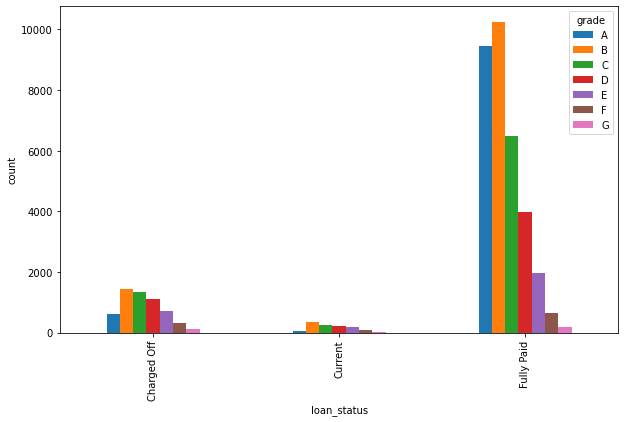

In [31]:
a=pd.crosstab(df.loan_status,df.grade)
a.plot(kind='bar', figsize=(10,6), ylabel='count')

In [32]:
b=pd.crosstab(df.loan_status,df.term)
b

term,36,60
loan_status,,
Charged Off,3227,2400
Current,0,1140
Fully Paid,25869,7081


<AxesSubplot:xlabel='loan_status', ylabel='count'>

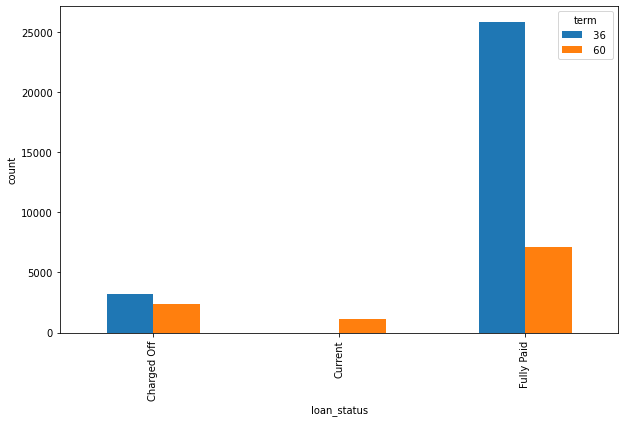

In [33]:
b.plot(kind='bar',figsize=(10,6),ylabel='count')

In [34]:
c=pd.crosstab(df.loan_status,df.verification_status)
c

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,2142,1434,2051
Current,227,310,603
Fully Paid,14552,8243,10155


<AxesSubplot:xlabel='loan_status', ylabel='count'>

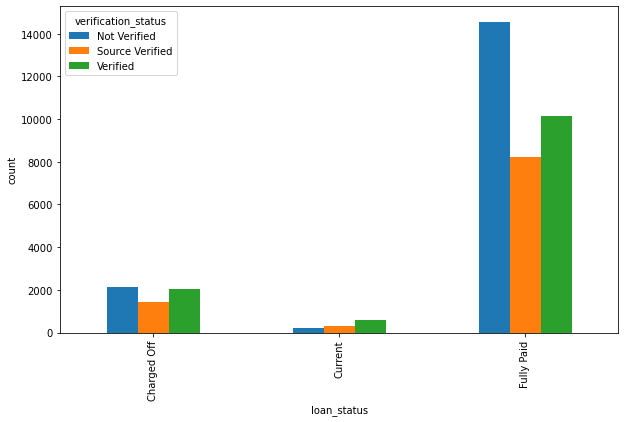

In [35]:
c.plot(kind='bar',figsize=(10,6),ylabel='count')

x=df.term.value_counts()
y1=df[df['loan_status']=='Fully Paid'].grade.value_counts()
y2=df[df['loan_status']=='Charged Off'].grade.value_counts()
y3=df[df['loan_status']=='Current'].grade.value_counts()
width=0.2


plt.figure(figsize=(12,6))

plt.bar(x,y1,width,color='cyan')
plt.bar(x,y2,width,color='orange')
plt.bar(x,y3,width,color='green')
plt.xticks(x, ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E','Grade F','Grade G'])

plt.xlabel("grade")
plt.ylabel("loan status")
plt.legend(["Fully Paid ", "Charged Off", "Current"])

plt.show()

## Using a user defined function convert the ‘emp_len’ column into categorical column as follows - 
If emp_len is less than equals to 1 then recode as ‘fresher’.
If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
If emp_len is greater than 3 and less than 7 then recode as ‘senior’
If emp_len is greater than 7 then recode as ‘expert’.

In [36]:
import warnings

In [37]:
warnings.simplefilter('ignore')

In [ ]:
for i in range (0,len(df['new_emp_length'])):
    if df['new_emp_length'][i]=='':
        df['new_emp_length'] = np.nan

In [43]:
for i in range (0,len(df['new_emp_length'])):
    if df['new_emp_length'][i] in ['1']:
        df['category'][i]='Fresher'
    elif df['new_emp_length'][i] in ['2','3']:
        df['category'][i]='Junior'
    elif df['new_emp_length'][i] in ['4','5','6','7']:
        df['category'][i]='Senior'
    else:
        df['category'][i]='Expert'

In [42]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,new_emp_length,risky_loan_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,10,1
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,1,1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,10,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,10,1
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,4 years,...,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,4,1
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,3 years,...,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,3,1
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,1,...,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,1,1
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,1,...,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,1,1


## Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot.

In [ ]:
import seaborn as sns

In [50]:
colors = sns.color_palette('bright')[0:5]

In [52]:
df.groupby(['grade']).loan_amnt.sum()

grade
A     86982400
B    133651350
C     89115825
D     65160400
E     45037900
F     19263100
G      6391675
Name: loan_amnt, dtype: int64

<AxesSubplot:ylabel='loan_amnt'>

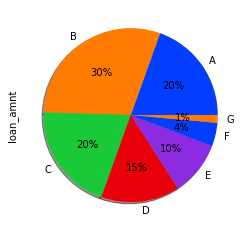

In [51]:
df.groupby(['grade']).loan_amnt.sum().plot(kind='pie', autopct='%1.0f%%',shadow=True,colors = colors)